# Lab 11

This week, we are focusing on gradient descent. Like last week, we wil be using the fake employee dataset with the goal of finding the best parameters for linear regression. The goals for this week are:

0. ~Reviewing grid search and the drawbacks of it~
1. ~Motivate the process for gradient descent~ 
2. Detail the steps of gradient descent
3. Define the learning rate for gradient descent and the impact of it on the speed of the algorithm





### Imports for Today

Let us import the packages that we need for today and the dataset from last time.

In [2]:
## Import block
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import seaborn as sns; sns.set()

import numpy as np
import pandas as pd

from sklearn import linear_model

In [3]:
## Functions for later use

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color="lightblue")
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
def place_parameter(p_vec, col, ax=None):
    plt.scatter(p_vec[0],p_vec[1], c=col, marker = "*", s = 100)
    
def draw_parameter_path(p0,p1, col, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color=col)
    ax.annotate('', p1, p0, arrowprops=arrowprops)   
    
def compute_mse(truth_vec, predict_vec):
    return np.mean((truth_vec - predict_vec)**2)
    
def compute_m_partial(in_vals, truth_vec, predict_vec):
    return -2*np.mean(in_vals*(truth_vec-predict_vec))

def compute_b_partial(truth_vec, predict_vec):
    return -2*np.mean(truth_vec-predict_vec)

In [4]:
## Import Data

employ_data = pd.read_csv("../Lab09/lab9data.csv", sep = ",")

## numpy vectors of our inputs
neuro = employ_data[["neuroticism"]].to_numpy()
perform = employ_data[["performance"]].to_numpy()

In [ ]:
# For function testing 




### Where are we? 

Last class, we spent considerable time motivating the role of the gradient descent in stepping towards the minimum. As many of you noticed, our first five steps seemed to be not making much progress towards that goal. 

Today's class will be a periods of coding punctuated by discussion and brainstorming. 

## Coding Session 1 

At its core, **gradient descent** is a series of steps dictated by the _gradient_ _descending_ an evaluation surface. 

In the below code block, create an iterative process that creates lists of $m$ values, $b$ values, and the MSE associated to it. We should be able to state the number of steps `n_steps` and decend that number of times. 

In [6]:
# Coding session 1


Similarly to the submission for Lab 10, plot your path with the parameters selected by the `sklearn` implementation of linear regression. 

In [ ]:
# Plot your results here


### Coding session 1 - Reflection 1

Try a few values for `n_steps`, say up to 5000. Plot the resulting paths again in comparison to the parameters selected by the `sklearn` implementation of linear regression. 

What surprises you? What ideas/questions/concerns do you have? 

In [ ]:
# Block for exploration 

In [ ]:
# Block for additional exploration 

In [ ]:
# Block for more exploration 

In [ ]:
# Block for testing an idea (or two) for Gradient Descent

### Brainstorming session 1

What do we notice? Let's try to come up with at least 5 ideas/questions:
* 
* 
* 
* 
* 

### Coding session 1 - Reflection 2

Fix the value for `n_steps` to 200. This time vary the value for L from 0.0001 to 1. Plot the resulting paths again in comparison to the parameters selected by the `sklearn` implementation of linear regression. 

What surprises you? What ideas/questions/concerns do you have? 

In [ ]:
# Block for exploration 

In [ ]:
# Block for additional exploration 

In [ ]:
# Block for more exploration 

In [ ]:
# Block for testing an idea (or two) for Gradient Descent

### Brainstorming session 2

What do we notice? Let's try to come up with at least 5 ideas/questions:
* 
* 
* 
* 
* 

## Considerations in Gradient Descent

We have two big considerations in gradient descent: 1) the size of the step that we are taking and 2) the number of steps that we are taking. 

The first is governed in part by the **learning rate** which we have denoted as $L$. 

## Learning Rate



## Stopping conditions 


# Gradient descent

Implement gradient descent 

#### With respect to $m$

Let's begin with the first one. Recall that we defined MSE as:

\begin{equation}
MSE(truth, guess) = avg(truth - guess)^2
\end{equation}

For ease of notation, let's refer to "truth" or the true performance score as $p_i$ for each $i$ data point. Similarly, let $n_i$ be the neuroticism score. This notation means that the "guess" for each $i$ data point is given by $(m*n_i + b)$ for current values of $m$ and $b$. If $D$ is the number of datapoints, we can re-write this MSE as:

\begin{equation}
MSE = \dfrac{1}{D}\Sigma_{i}(p_i - (m*n_i + b))^2
\end{equation}

Now, to take the partial derivative with respect to $m$, we treat every notation -- except $m$ -- in our equation as a **fixed** number (like the number 4) and treat $m$ as something that can vary (or as something that is unknown). 

Recalling that the derivative of $(f(x))^2$ is $2*f(x)*f'(x)$ (or 2 times the original function times the derivative of the original function) by the chain rule, then the partial derivative of MSE with respect to $m$ (denoted as $d_m(MSE)$) is: 

\begin{equation}
d_m(MSE) = d_m(\dfrac{1}{D}\Sigma_{i}(p_i - (m*n_i + b))^2)\\
~\hspace{3cm} = \dfrac{1}{D}\Sigma_{i} 2*(p_i - (m*n_i + b))*(-n_i) \\
~\hspace{2cm} = \dfrac{-2}{D}\Sigma_{i} (n_i)(p_i - (m*n_i + b))
\end{equation}

Interpreting this into the original formulation, we have that the partial derivative of MSE with respect to $m$ is: 

\begin{equation}
d_m(MSE) = -2*avg((neuro)*(truth - (guess)))
\end{equation}

Now that we have this partial derivative, we plug in the **current** values for each of these components. The resulting value tells us how far to move in the $m$ direction. 

In the fuction block, there is a function `compute_m_partial` that currently just `pass`es. Please complete this formula. 

#### With respect to $b$

The second one is much like the first. We begin with the re-written MSE, treating every notation -- except $b$ -- in our equation as a **fixed** number (like the number 4) and treat $b$ as something that can vary (or as something that is unknown): 

\begin{equation}
d_b(MSE) = d_b(\dfrac{1}{D}\Sigma_{i}(p_i - (m*n_i + b))^2)\\
~\hspace{3cm} = \dfrac{1}{D}\Sigma_{i} 2*(p_i - (m*n_i + b))*(-1) \\
~\hspace{2cm} = \dfrac{-2}{D}\Sigma_{i} (p_i - (m*n_i + b))
\end{equation}

Interpreting this into the original formulation, we have that the partial derivative of MSE with respect to $m$ is: 

\begin{equation}
d_b(MSE) = -2*avg((truth - (guess)))
\end{equation}

Now that we have this partial derivative, we plug in the **current** values for each of these components. The resulting value tells us how far to move in the $b$ direction. 

In the fuction block, there is a function `compute_b_partial` that currently just `pass`es. Please complete this formula. 

#### Using the partial derivatives

The partial derivatives tell us the steepest direction to move in from our current point. Since we want to move towards the minimum, we choose to move in the direction of the negative gradient. 

We also want to decide how much we want to move each time. Let's call this value $L$

That is, we update our values for $m$ and $b$ as follows:

\begin{equation}
m_{new} = m - L*d_m(MSE) \\
b_{new} = b - L*d_b(MSE)
\end{equation}

#### Each Journey begins with a first step

Starting with $m=0$ and $b=0$, compute the gradient and update your values for $m$ and $b$ setting $L = 0.0001$. Chart your this first step on the below plot: 

In [25]:
# Set starting point for m and b (called m0 and b0)
m0 = 
b0 = 

# Computing the gradient
preds = 
d_m = 
d_b = 

# Set L
L = 0.0001

# Updating the parameter values 
m1 = 
b1 = 

print(d_b)
print(m1,b1)


-5322.511292812973
1.7359199918276431 0.5322511292812974


<IPython.core.display.Javascript object>


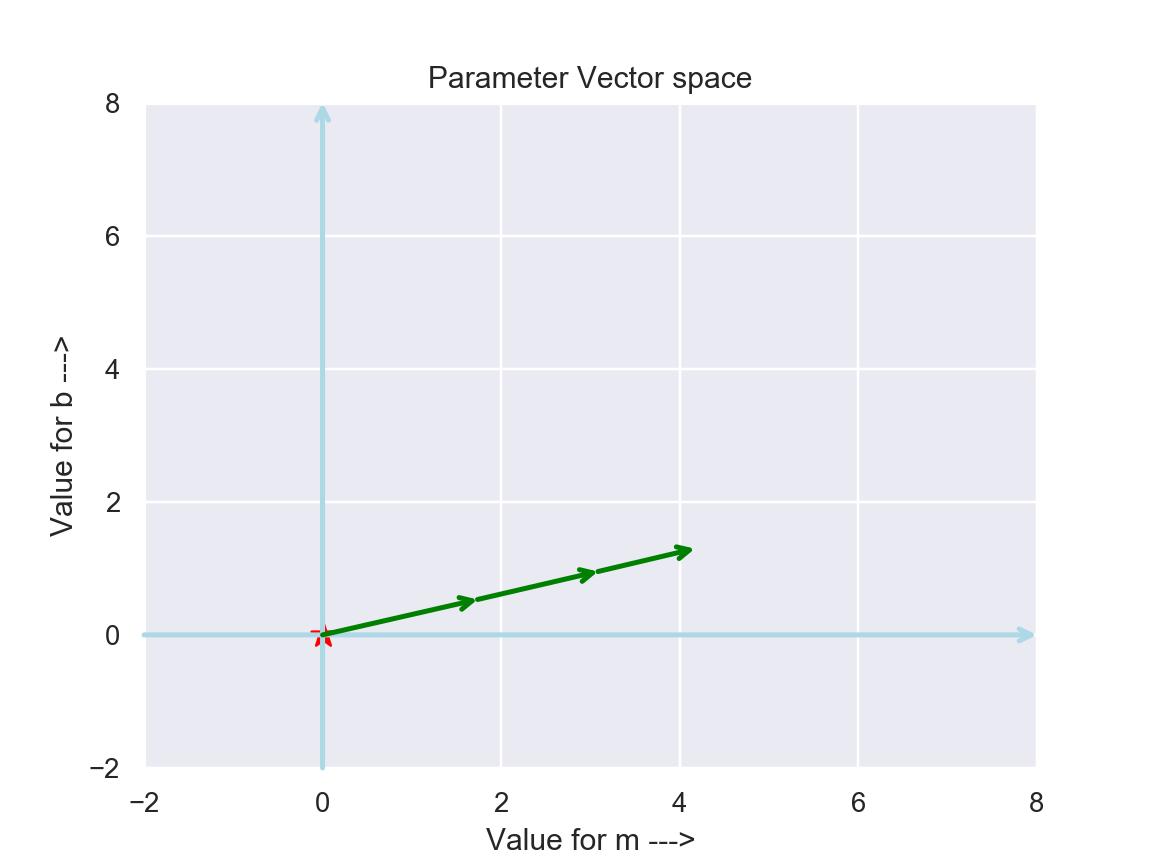

Text(0.5, 1.0, 'Parameter Vector space')

In [22]:
fig = plt.figure()

# Set axis limits
xmin = -2
xmax = 8
ymin = -2
ymax = 8

plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Build axes
draw_vector([xmin,0], [xmax,0])
draw_vector([0,ymin], [0,ymax])

# Starting place 
place_parameter([0,0],"red")

# First step
draw_parameter_path(???,???,"green")

# Create grid and labels
plt.grid(True)
plt.xlabel('Value for m --->')
plt.ylabel('Value for b --->')
plt.title('Parameter Vector space')

Compute the next step and plot it on your image. What do you notice? 

In [ ]:
# Code block for you


In [ ]:
# plotting block for you 


## Next time

Putting this all together into gradient descent with a proper learning rate. 

### Final Thoughts

To finish up this lab, compute the first 5 steps using the gradient. Create a plot with both the first five steps SND the best values of $m$ and $b$ according to the linear regression from `sklearn`. 
Share your plot in a post on **#lab_submission** channel on slack and share something that you find odd you about your plot. Your post must start with **Lab10** to get credit. 

If your have questions from this lab, post them to #lab_questions with the same preamble (i.e. starting with **Lab10**). If you have the same question, please use one of the emoji's to upvote the question. If you would like to answer someone's question, please use the thread function. This will tie your answer to their question. 

#### Resources consulted 

0. _Doing Data Science: Straight talk from the frontline_ by C. O'Neil & R. Schutt (2014)
1. [BATCH GRADIENT DESCENT VS STOCHASTIC GRADIENT DESCENT](https://www.bogotobogo.com/python/scikit-learn/scikit-learn_batch-gradient-descent-versus-stochastic-gradient-descent.php)
2. [Gradient descent algorithms and adaptive learning rate adjustment methods](https://towardsdatascience.com/gradient-descent-algorithms-and-adaptive-learning-rate-adjustment-methods-79c701b086be)
3. [Learning Rate Schedules and Adaptive Learning Rate Methods for Deep Learning](https://towardsdatascience.com/gradient-descent-algorithms-and-adaptive-learning-rate-adjustment-methods-79c701b086be)
